# Interval tests

**genomeinterv** implements tests for a significant relationship between sets of intervals.

In [8]:
#| echo: false
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

## Proximity

[](`~genominterv.stats.proximity_test`) computes tests if intervals in one set is significantly
proximal to intervals in another set.

In [14]:
annot = pd.DataFrame(dict(chrom='chr1', 
                          start=[38_000_000, 158_000_000, 238_000_000], 
                          end=[40_000_000, 160_000_000, 240_000_000]))
query = pd.DataFrame(dict(chrom='chr1', 
                          start=[41_000_000, 162_000_000, 241_000_000], 
                          end=[40_500_000, 161_000_000, 241_000_000]))

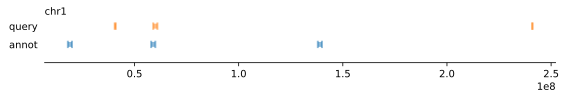

In [34]:
#| echo: false
#| label: fig-proximity
#| fig-cap: "Intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(annot=annot, query=query)

In [16]:
from genominterv.stats import proximity_test

stat, pvalue = proximity_test(query, annot)
pvalue

2 3
True 1
4 5
True 1
6 7
True 1


0.0

## Overlap

[](`~genominterv.stats.jaccard_stat`) computes the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
statistic for two sets of genomic intervals.


This can be combined with the [](`~genominterv.decorators.bootstrap`) decorator to produce a test for overlap. The decorator turns a function producing
a statistic into one that also produces a p-value. The bootstrapping resamples
the intervals of the second argument for each chromosome independently. Only
required argument to bootstrap is the name of the chromosome assembly used.

In [30]:
annot = pd.DataFrame(dict(chrom='chr1', 
                          start=[18_000_000, 58_000_000, 138_000_000], 
                          end=[20_000_000, 60_000_000, 140_000_000]))
query = pd.DataFrame(dict(chrom='chr1', 
                          start=[41_000_000, 59_000_000, 241_000_000], 
                          end=[40_500_000, 61_000_000, 241_000_000]))

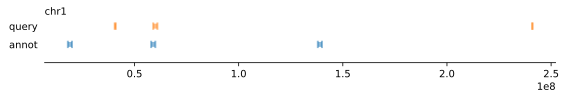

In [ ]:
#| echo: false
#| label: fig-overlap
#| fig-cap: "Intervals"
from genominterv.intervals import _plot_intervals
_plot_intervals(annot=annot, query=query)

In [33]:
from genominterv.decorators import bootstrap
from genominterv.stats import jaccard_stat

@bootstrap('hg19', samples=1000)
def jaccard_test(q, a):
    return jaccard_stat(q, a)

stat, p_value = jaccard_test(query, annot)
stat, p_value 

(0.15384615384615385, 0.03)